In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Question and Objective**
Question: Which lines are struggling to provide consistent service?

Objective: Find Standard Deviation in times, Coefficient of Varience and prepare data for analysis in Tableau

### **Importing necessary information**

In [5]:
trips = pd.read_csv("./rail_data/trips.txt")
routes = pd.read_csv("./rail_data/routes.txt")
stop_times = pd.read_csv("./rail_data/stop_times.txt")
stops = pd.read_csv("./rail_data/stops.txt")

In [6]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,1,1,1,30TH ST. PHL.,0,4660,1
1,1,1,2,30TH ST. PHL.,0,4662,2
2,1,1,3,30TH ST. PHL.,0,4664,3
3,1,1,4,30TH ST. PHL.,0,4668,4
4,1,1,5,30TH ST. PHL.,0,4670,5


In [7]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,route_color
0,1,NJT,ATLC,Atlantic City Rail Line,2,NaN,075AAA
1,2,NJT,BNTN,Montclair-Boonton Line,2,NaN,E66859
2,3,NJT,BNTNM,Montclair-Boonton Line,2,NaN,E66859
3,4,NJT,HBLR,Hudson-Bergen Light Rail,0,NaN,008080
4,5,NJT,MNBN,Main/Bergen County Line,2,NaN,FFD411


In [8]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled
0,1,04:28:00,04:28:00,10,1,0,0,0.0000
1,1,04:39:00,04:39:00,2,2,0,0,5.8924
2,1,04:49:00,04:49:00,39,3,0,0,16.4295
3,1,05:00:00,05:00:00,55,4,0,0,27.2915
4,1,05:13:00,05:13:00,9,5,0,0,40.2494


In [9]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id
0,1,95001,30TH ST. PHL.,NaN,39.956565,-75.182327,5961
1,2,95002,ABSECON,NaN,39.424333,-74.502094,333
2,3,95003,ALLENDALE,NaN,41.030902,-74.130957,2893
3,4,95004,ALLENHURST,NaN,40.237659,-74.006769,5453
4,5,95005,ANDERSON STREET,NaN,40.894458,-74.043781,1357


In [10]:
# Game Plan: 
# Goal: One table with data for average route duration and number of stops per route.
# Needs:  Which stops belong to which line
#         Stop Names
#         Duration of Journeys
#         Distance Between Stations
# 
# Joins:  routes -> trips on trip_id
#         stop_times -> stops on stop_id
#         trips -> stop_times on trip_id

### **Merging Information**

In [11]:
# trips <- routes on route_id
trips_routes = pd.merge(trips, routes, on='route_id', how = 'left')

# stop_times <- stops on stop_id
stops_and_times = pd.merge(stop_times, stops, on = 'stop_id', how = 'left')

merged_data = pd.merge(trips_routes, stops_and_times, on = 'trip_id', how = 'left')

In [12]:
merged_data.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,agency_id,route_short_name,route_long_name,...,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id
0,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,1,0,0,0.0000,95010,ATLANTIC CITY,NaN,39.363299,-74.441486,77
1,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,2,0,0,5.8924,95002,ABSECON,NaN,39.424333,-74.502094,333
2,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,3,0,0,16.4295,95039,EGG HARBOR,NaN,39.526441,-74.648028,1613
3,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,4,0,0,27.2915,95055,HAMMONTON,NaN,39.631673,-74.799460,2893
4,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,5,0,0,40.2494,95009,ATCO,NaN,39.783547,-74.907588,4429


### **Basic Data Cleaning and Verification**

In [13]:
# Verifying that there are no usable data in the stop desc column
merged_data['stop_desc'].value_counts()

Series([], Name: count, dtype: int64)

In [14]:
merged_data = merged_data.drop("stop_desc", axis = 1)
merged_data.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,agency_id,route_short_name,route_long_name,...,stop_id,stop_sequence,pickup_type,drop_off_type,shape_dist_traveled,stop_code,stop_name,stop_lat,stop_lon,zone_id
0,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,10,1,0,0,0.0000,95010,ATLANTIC CITY,39.363299,-74.441486,77
1,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,2,2,0,0,5.8924,95002,ABSECON,39.424333,-74.502094,333
2,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,39,3,0,0,16.4295,95039,EGG HARBOR,39.526441,-74.648028,1613
3,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,55,4,0,0,27.2915,95055,HAMMONTON,39.631673,-74.799460,2893
4,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,9,5,0,0,40.2494,95009,ATCO,39.783547,-74.907588,4429


### **Adding Route Durations by Trip**

In [15]:
def clean_gtfs_time(time_str):
    h, m, s = map(int, time_str.split(':'))
    return (h * 3600) + (m * 60) + s

In [16]:
merged_data['arrival_seconds'] = merged_data['arrival_time'].apply(clean_gtfs_time)
merged_data['departure_seconds'] = merged_data['departure_time'].apply(clean_gtfs_time)

In [17]:
trip_durations = merged_data.groupby('trip_id').agg(
    start_time = ('arrival_seconds', 'min'),
    end_time = ('arrival_seconds', 'max'),
    stop_count = ('stop_id', 'count')
).reset_index()

trip_durations['duration_minutes'] = (trip_durations['end_time'] - trip_durations['start_time']) / 60

In [18]:
final_preformance_df = pd.merge(merged_data, trip_durations, on = 'trip_id', how = 'inner')

In [19]:
final_preformance_df.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,agency_id,route_short_name,route_long_name,...,stop_name,stop_lat,stop_lon,zone_id,arrival_seconds,departure_seconds,start_time,end_time,stop_count,duration_minutes
0,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,ATLANTIC CITY,39.363299,-74.441486,77,16080,16080,16080,21840,9,96.0
1,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,ABSECON,39.424333,-74.502094,333,16740,16740,16080,21840,9,96.0
2,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,EGG HARBOR,39.526441,-74.648028,1613,17340,17340,16080,21840,9,96.0
3,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,HAMMONTON,39.631673,-74.799460,2893,18000,18000,16080,21840,9,96.0
4,1,1,1,30TH ST. PHL.,0,4660,1,NJT,ATLC,Atlantic City Rail Line,...,ATCO,39.783547,-74.907588,4429,18780,18780,16080,21840,9,96.0


In [20]:
final_preformance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44209 entries, 0 to 44208
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   route_id             44209 non-null  int64  
 1   service_id           44209 non-null  int64  
 2   trip_id              44209 non-null  int64  
 3   trip_headsign        44209 non-null  object 
 4   direction_id         44209 non-null  int64  
 5   block_id             43223 non-null  object 
 6   shape_id             44209 non-null  int64  
 7   agency_id            44209 non-null  object 
 8   route_short_name     44209 non-null  object 
 9   route_long_name      44209 non-null  object 
 10  route_type           44209 non-null  int64  
 11  route_url            0 non-null      float64
 12  route_color          44209 non-null  object 
 13  arrival_time         44209 non-null  object 
 14  departure_time       44209 non-null  object 
 15  stop_id              44209 non-null 

### **Reducing the DataFrame to Analyze Efficiency of Each trip**

In [21]:
trip_summary = final_preformance_df.groupby('trip_id').agg({
    'route_id' : 'first',
    'route_long_name' : 'first',
    'route_color' : 'first',
    'stop_id' : 'count',
    'service_id' : 'first',
    'duration_minutes' : 'first'
}).reset_index()

In [22]:
trip_summary.head()

,trip_id,route_id,route_long_name,route_color,stop_id,service_id,duration_minutes
0,1,1,Atlantic City Rail Line,075AAA,9,1,96.0
1,2,1,Atlantic City Rail Line,075AAA,9,1,97.0
2,3,1,Atlantic City Rail Line,075AAA,9,1,99.0
3,4,1,Atlantic City Rail Line,075AAA,9,1,100.0
4,5,1,Atlantic City Rail Line,075AAA,9,1,100.0


In [23]:
trip_summary

,trip_id,route_id,route_long_name,route_color,stop_id,service_id,duration_minutes
0,1,1,Atlantic City Rail Line,075AAA,9,1,96.0
1,2,1,Atlantic City Rail Line,075AAA,9,1,97.0
2,3,1,Atlantic City Rail Line,075AAA,9,1,99.0
3,4,1,Atlantic City Rail Line,075AAA,9,1,100.0
4,5,1,Atlantic City Rail Line,075AAA,9,1,100.0
...,...,...,...,...,...,...,...
3329,3330,17,Riverline Light Rail,00008B,21,10,67.0
3330,3331,17,Riverline Light Rail,00008B,19,10,67.0
3331,3332,17,Riverline Light Rail,00008B,7,10,18.0
3332,3333,17,Riverline Light Rail,00008B,10,10,45.0


### **Splitting Routes For Individual Analysis**

In [24]:
def create_route_df(route_id):
    df = trip_summary[trip_summary['route_id'] == route_id]
    return df

In [25]:
for i in range(17):
    print("route_{} = create_route_df({})".format(i + 1, i + 1)) #Just making variable names

route_1 = create_route_df(1)
route_2 = create_route_df(2)
route_3 = create_route_df(3)
route_4 = create_route_df(4)
route_5 = create_route_df(5)
route_6 = create_route_df(6)
route_7 = create_route_df(7)
route_8 = create_route_df(8)
route_9 = create_route_df(9)
route_10 = create_route_df(10)
route_11 = create_route_df(11)
route_12 = create_route_df(12)
route_13 = create_route_df(13)
route_14 = create_route_df(14)
route_15 = create_route_df(15)
route_16 = create_route_df(16)
route_17 = create_route_df(17)


In [26]:
route_1 = create_route_df(1)
route_2 = create_route_df(2)
route_3 = create_route_df(3)
route_4 = create_route_df(4)
route_5 = create_route_df(5)
route_6 = create_route_df(6)
route_7 = create_route_df(7)
route_8 = create_route_df(8)
route_9 = create_route_df(9)
route_10 = create_route_df(10)
route_11 = create_route_df(11)
route_12 = create_route_df(12)
route_13 = create_route_df(13)
route_14 = create_route_df(14)
route_15 = create_route_df(15)
route_16 = create_route_df(16)
route_17 = create_route_df(17)

In [27]:
route_1.head()

,trip_id,route_id,route_long_name,route_color,stop_id,service_id,duration_minutes
0,1,1,Atlantic City Rail Line,075AAA,9,1,96.0
1,2,1,Atlantic City Rail Line,075AAA,9,1,97.0
2,3,1,Atlantic City Rail Line,075AAA,9,1,99.0
3,4,1,Atlantic City Rail Line,075AAA,9,1,100.0
4,5,1,Atlantic City Rail Line,075AAA,9,1,100.0


In [28]:
for i in range(17):
    print("route_{}, ".format(i + 1), end = "")

route_1, route_2, route_3, route_4, route_5, route_6, route_7, route_8, route_9, route_10, route_11, route_12, route_13, route_14, route_15, route_16, route_17, 

In [29]:
routes_list = [route_1, route_2, route_3, route_4, route_5, route_6, route_7, route_8, route_9, route_10, route_11, route_12, route_13, route_14, route_15, route_16, route_17]

 ### **Standard Deviation in Times By Trip per line**

In [30]:
def get_std_deviation(route):
    return route['duration_minutes'].std()

In [31]:
standard_deviations = []

for i in range(len(routes_list)):
    # Append standard deviation by route
    standard_deviations.append(get_std_deviation(routes_list[i]))

In [32]:
route_stats = pd.DataFrame(standard_deviations, columns = ['standard_deviation'])

In [33]:
average_durations = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    average_durations.append(curr_df['duration_minutes'].mean())

In [34]:
median_durations = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    median_durations.append(curr_df['duration_minutes'].median())

### **Creating new DataFrame for Top-level statistics**

In [35]:
route_names = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    route_names.append(curr_df['route_long_name'].iloc[0])

In [36]:
route_colors = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    route_colors.append(curr_df['route_color'].iloc[0])

In [37]:
service_ids = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    service_ids.append(curr_df['service_id'].iloc[0])

In [38]:
durations = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    durations.append(curr_df['duration_minutes'].iloc[0])

In [39]:
route_ids = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    route_ids.append(curr_df['route_id'].iloc[0])

In [40]:
num_trips = []

for i in range(len(routes_list)):
    curr_df = routes_list[i]
    num_trips.append(len(curr_df))

In [41]:
top_level = pd.DataFrame()

In [42]:
def add_list(col_name, list_name):
    top_level[col_name] = list_name

In [43]:
add_list('route_long_name', route_names)

In [44]:
add_list('route_id', route_ids)
add_list('route_color', route_colors)
add_list('service_id', service_ids)
add_list('mean_duration', average_durations)
add_list('median_duration', median_durations)
add_list('standard_deviation', standard_deviations)
add_list('num_trips', num_trips)

In [45]:
route_stats = top_level

In [46]:
route_stats

,route_long_name,route_id,route_color,service_id,mean_duration,median_duration,standard_deviation,num_trips
0,Atlantic City Rail Line,1,075AAA,1,97.020833,96.0,2.383361,48
1,Montclair-Boonton Line,2,E66859,4,104.350000,100.0,13.378203,20
2,Montclair-Boonton Line,3,E66859,5,48.500000,51.0,7.958754,80
3,Hudson-Bergen Light Rail,4,008080,8,31.118782,31.0,8.169638,985
4,Main/Bergen County Line,5,FFD411,3,62.083333,67.5,9.544988,168
5,Port Jervis Line,6,FFD411,4,138.877551,137.0,13.468532,49
6,Morris & Essex Line,7,08A652,16,83.194118,89.0,21.554746,170
7,Gladstone Branch,8,A4C9AA,4,73.293478,80.0,22.961285,92
8,Meadowlands Rail Line,9,C1AA72,18,16.209302,13.0,5.226116,43
9,Northeast Corridor,10,DD3439,7,81.649573,88.0,18.057522,234


## Side Question: is there a correlation between duration and inconsistency?

In [47]:
correlation = route_stats['mean_duration'].corr(route_stats['standard_deviation'])
print(correlation)

0.40117154238433683


## **Consistency as a percentage of time (Coefficient of Varience)**

In [48]:
route_stats['percentage_duration'] = route_stats.apply(lambda row: (row['standard_deviation'] / row['mean_duration']) * 100, axis = 1)

In [49]:
route_stats

,route_long_name,route_id,route_color,service_id,mean_duration,median_duration,standard_deviation,num_trips,percentage_duration
0,Atlantic City Rail Line,1,075AAA,1,97.020833,96.0,2.383361,48,2.456545
1,Montclair-Boonton Line,2,E66859,4,104.350000,100.0,13.378203,20,12.820511
2,Montclair-Boonton Line,3,E66859,5,48.500000,51.0,7.958754,80,16.409803
3,Hudson-Bergen Light Rail,4,008080,8,31.118782,31.0,8.169638,985,26.253079
4,Main/Bergen County Line,5,FFD411,3,62.083333,67.5,9.544988,168,15.374477
5,Port Jervis Line,6,FFD411,4,138.877551,137.0,13.468532,49,9.698135
6,Morris & Essex Line,7,08A652,16,83.194118,89.0,21.554746,170,25.908978
7,Gladstone Branch,8,A4C9AA,4,73.293478,80.0,22.961285,92,31.327869
8,Meadowlands Rail Line,9,C1AA72,18,16.209302,13.0,5.226116,43,32.241464
9,Northeast Corridor,10,DD3439,7,81.649573,88.0,18.057522,234,22.115881


[]

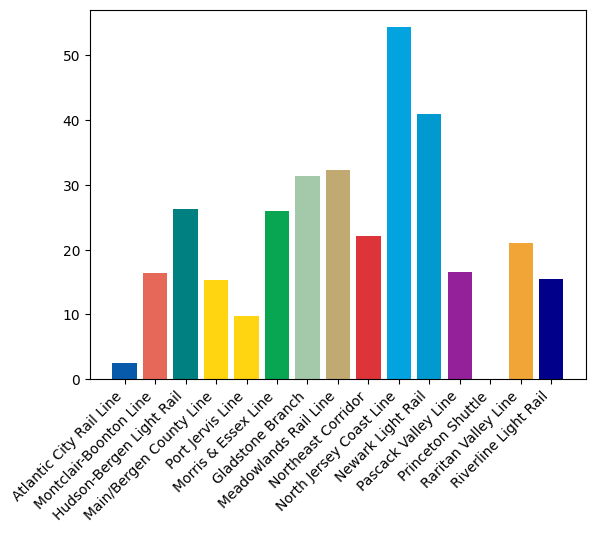

In [50]:
colors = route_stats['route_color'].apply(lambda row: "#" + row)

plt.bar(route_stats['route_long_name'], route_stats['percentage_duration'], color = colors)
plt.xticks(rotation = 45, ha = 'right')
plt.plot()

In [61]:
route_stats.to_csv("route_statistics.csv", index = False)

In [68]:
for i in range(len(routes_list)):
    print('route_{}.to_csv("route_{}_data.csv", index = False)'.format(i+1, i+1))

route_1.to_csv("route_1_data.csv", index = False)
route_2.to_csv("route_2_data.csv", index = False)
route_3.to_csv("route_3_data.csv", index = False)
route_4.to_csv("route_4_data.csv", index = False)
route_5.to_csv("route_5_data.csv", index = False)
route_6.to_csv("route_6_data.csv", index = False)
route_7.to_csv("route_7_data.csv", index = False)
route_8.to_csv("route_8_data.csv", index = False)
route_9.to_csv("route_9_data.csv", index = False)
route_10.to_csv("route_10_data.csv", index = False)
route_11.to_csv("route_11_data.csv", index = False)
route_12.to_csv("route_12_data.csv", index = False)
route_13.to_csv("route_13_data.csv", index = False)
route_14.to_csv("route_14_data.csv", index = False)
route_15.to_csv("route_15_data.csv", index = False)
route_16.to_csv("route_16_data.csv", index = False)
route_17.to_csv("route_17_data.csv", index = False)


In [69]:
route_1.to_csv("route_1_data.csv", index = False)
route_2.to_csv("route_2_data.csv", index = False)
route_3.to_csv("route_3_data.csv", index = False)
route_4.to_csv("route_4_data.csv", index = False)
route_5.to_csv("route_5_data.csv", index = False)
route_6.to_csv("route_6_data.csv", index = False)
route_7.to_csv("route_7_data.csv", index = False)
route_8.to_csv("route_8_data.csv", index = False)
route_9.to_csv("route_9_data.csv", index = False)
route_10.to_csv("route_10_data.csv", index = False)
route_11.to_csv("route_11_data.csv", index = False)
route_12.to_csv("route_12_data.csv", index = False)
route_13.to_csv("route_13_data.csv", index = False)
route_14.to_csv("route_14_data.csv", index = False)
route_15.to_csv("route_15_data.csv", index = False)
route_16.to_csv("route_16_data.csv", index = False)
route_17.to_csv("route_17_data.csv", index = False)